# Ground Motion Displacement RMS vs Time

*an example simple tutorial for getting seismic data, computing the power spectral densities, extracting the RMS and plotting*

Required:

- python
- obspy (and its dependencies)
- pandas
- jupyter
- notebook

this should be easy to set up in a conda env: ``conda create -c conda-forge -n covid python=3.7 obspy pandas jupyter notebook``

Author: Thomas Lecocq @seismotom, Fred Massin @fmassin, Claudio Satriano @claudiodsf

## Step 1: imports

In [1]:
import datetime
import os
from glob import glob

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42  # to edit text in Illustrator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as pe
import numpy as np
import pandas as pd

from obspy import UTCDateTime, read
from obspy.clients.fdsn import Client
from obspy.signal import PPSD


## Step 2: Define Start/End dates and Seismic Channel

You'll have to make sure the seed_id you request is indeed available from the ``data_provider``

In [15]:
start = UTCDateTime("2020-03-10")
# Leaving UTCDateTime() empty means "now":
end = UTCDateTime()

network = "NZ"
station = "FOZ"
location = "11"
channel = "HHZ"
dataset = "WestCoast"
time_zone = "Pacific/Auckland"

data_provider = "GEONET"
logo = None #plt.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Logo_SED_2014.png/220px-Logo_SED_2014.png')
bans = {"2020-03-23 23:59":'Level 3', 
        "2020-03-25 23:59":'Level 4'}


## Step 3: Download the seismic waveform data

This step is coded so that only the last day is redownloaded if the daily files are present on the disk.

The request gets the target day +- 30 minutes to avoid having gaps at the end of each day (need 1 window covering midnight).

In [4]:
datelist = pd.date_range(start.datetime, end.datetime, freq="D")
c = Client(data_provider)
nrt_client = Client("http://service-nrt.geonet.org.nz")

nslc = "{}.{}.{}.{}".format(network, station, location, channel)
# make sure that wildcard characters are not in nslc
nslc = nslc.replace("*", "").replace("?", "")
for day in datelist:
    datestr = day.strftime("%Y-%m-%d")
    fn = "{}_{}_{}.mseed".format(dataset, datestr, nslc)
    print(fn)
    if day != datelist[-1] and os.path.isfile(fn):
        continue
    else:
        args = (network, station, location, channel,
                UTCDateTime(day)-1801, UTCDateTime(day)+86400+1801,)
        try:
            st = c.get_waveforms(*args, attach_response=True)
        except Exception as e:
            print(e)
            st = nrt_client.get_waveforms(*args, attach_response=True)
        print(st)
        st.write(fn)
resp = c.get_stations(UTCDateTime(day), network=network, station=station, location=location,
                      channel=channel, level="response")
print(resp)


WestCoast_2020-03-10_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-11_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-12_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-13_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-14_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-15_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-16_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-17_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-18_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-19_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-20_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-21_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-22_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-23_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-24_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-25_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-26_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-27_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-28_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-29_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-30_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-03-31_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-04-01_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-04-02_NZ.FOZ.11.HHZ.mseed
WestCoast_2020-0

/home/chambeca/miniconda3/envs/eqcorrscan/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))


1 Trace(s) in Stream:
NZ.FOZ.11.HHZ | 2020-04-09T23:29:59.483129Z - 2020-04-11T00:30:01.003129Z | 100.0 Hz, 9000153 samples
WestCoast_2020-04-11_NZ.FOZ.11.HHZ.mseed
No data available for request.
Detailed response of server:




/home/chambeca/miniconda3/envs/eqcorrscan/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))


1 Trace(s) in Stream:
NZ.FOZ.11.HHZ | 2020-04-10T23:30:04.623132Z - 2020-04-12T00:30:01.003132Z | 100.0 Hz, 8999639 samples
WestCoast_2020-04-12_NZ.FOZ.11.HHZ.mseed
No data available for request.
Detailed response of server:




/home/chambeca/miniconda3/envs/eqcorrscan/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))


1 Trace(s) in Stream:
NZ.FOZ.11.HHZ | 2020-04-11T23:30:00.433123Z - 2020-04-13T00:30:01.003123Z | 100.0 Hz, 9000058 samples
WestCoast_2020-04-13_NZ.FOZ.11.HHZ.mseed
No data available for request.
Detailed response of server:




/home/chambeca/miniconda3/envs/eqcorrscan/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))


1 Trace(s) in Stream:
NZ.FOZ.11.HHZ | 2020-04-12T23:30:00.923131Z - 2020-04-14T00:30:01.003131Z | 100.0 Hz, 9000009 samples
WestCoast_2020-04-14_NZ.FOZ.11.HHZ.mseed
No data available for request.
Detailed response of server:




/home/chambeca/miniconda3/envs/eqcorrscan/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))


1 Trace(s) in Stream:
NZ.FOZ.11.HHZ | 2020-04-13T23:30:00.683124Z - 2020-04-14T23:55:57.113124Z | 100.0 Hz, 8795644 samples
Inventory created at 2020-04-08T21:51:56.000000Z
	Created by: Delta
		    
	Sending institution: GeoNet (WEL(GNS_Test))
	Contains:
		Networks (1):
			NZ
		Stations (1):
			NZ.FOZ (Fox Glacier)
		Channels (1):
			NZ.FOZ.11.HHZ


/home/chambeca/miniconda3/envs/eqcorrscan/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))


## Step 4: Compute PPSDs using custom parameters

These parameters are set to allow the PSDs to be "nervous", not as smooth as the default PQLX ones.

In [5]:
for day in datelist:
    datestr = day.strftime("%Y-%m-%d")
    fn_in = "{}_{}_{}.mseed".format(dataset, datestr, nslc)
    if day == datelist[-1] :
        continue
    stall = read(fn_in)
    for mseedid in list(set([tr.id for tr in stall])):
        fn_out = "{}_{}_{}.npz".format(dataset, datestr, mseedid)
        if os.path.isfile(fn_out):
            print("%s done already."%fn_out)
            continue
        st = stall.select(id=mseedid)
        st.attach_response(resp)
        ppsd = PPSD(st[0].stats, metadata=resp,
                    ppsd_length=1800, overlap=0.5,
                    period_smoothing_width_octaves=0.025,
                    period_step_octaves=0.0125,
                    period_limits=(0.008, 50),
                    db_bins=(-200, 20, 0.25))
        ppsd.add(st)
        ppsd.save_npz(fn_out[:-4])
        print(st)
        del st, ppsd
    del stall


/home/chambeca/miniconda3/envs/eqcorrscan/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:998: RuntimeWarning: Mean of empty slice.
  smoothed_psd.append(specs.mean())
/home/chambeca/miniconda3/envs/eqcorrscan/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1 Trace(s) in Stream:
NZ.FOZ.11.HHZ | 2020-03-09T23:29:59.003128Z - 2020-03-11T00:30:01.003128Z | 100.0 Hz, 9000201 samples
1 Trace(s) in Stream:
NZ.FOZ.11.HHZ | 2020-03-10T23:29:59.003130Z - 2020-03-12T00:30:01.003130Z | 100.0 Hz, 9000201 samples
1 Trace(s) in Stream:
NZ.FOZ.11.HHZ | 2020-03-11T23:29:59.003130Z - 2020-03-13T00:30:01.003130Z | 100.0 Hz, 9000201 samples
1 Trace(s) in Stream:
NZ.FOZ.11.HHZ | 2020-03-12T23:29:59.003125Z - 2020-03-14T00:30:01.003125Z | 100.0 Hz, 9000201 samples
1 Trace(s) in Stream:
NZ.FOZ.11.HHZ | 2020-03-13T23:29:59.003128Z - 2020-03-15T00:30:01.003128Z | 100.0 Hz, 9000201 samples
1 Trace(s) in Stream:
NZ.FOZ.11.HHZ | 2020-03-14T23:29:59.003131Z - 2020-03-16T00:30:01.003131Z | 100.0 Hz, 9000201 samples
1 Trace(s) in Stream:
NZ.FOZ.11.HHZ | 2020-03-15T23:29:59.003132Z - 2020-03-17T00:30:01.003132Z | 100.0 Hz, 9000201 samples
1 Trace(s) in Stream:
NZ.FOZ.11.HHZ | 2020-03-16T23:29:59.003132Z - 2020-03-18T00:30:01.003132Z | 100.0 Hz, 9000201 samples
1 Trace(

## Step 5: Reload daily PSDs from the disk and create a single PPSD object:

In [6]:
ppsds = {}
for day in datelist:
    datestr = day.strftime("%Y-%m-%d")
    fn_pattern = "{}_{}_*.npz".format(dataset, datestr)
    for fn in glob(fn_pattern):
        mseedid = fn.replace(".npz", "").split("_")[-1]
        if mseedid not in ppsds:
            ppsds[mseedid] = PPSD.load_npz(fn, allow_pickle=True)
        else:
            ppsds[mseedid].add_npz(fn, allow_pickle=True)

/home/chambeca/miniconda3/envs/eqcorrscan/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:1539: UserWarning: 3/99 segments omitted in file 'WestCoast_2020-03-11_NZ.FOZ.11.HHZ.npz' (time ranges already covered).
  warnings.warn(msg)
/home/chambeca/miniconda3/envs/eqcorrscan/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:1539: UserWarning: 3/99 segments omitted in file 'WestCoast_2020-03-12_NZ.FOZ.11.HHZ.npz' (time ranges already covered).
  warnings.warn(msg)
/home/chambeca/miniconda3/envs/eqcorrscan/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:1539: UserWarning: 4/99 segments omitted in file 'WestCoast_2020-03-13_NZ.FOZ.11.HHZ.npz' (time ranges already covered).
  warnings.warn(msg)
/home/chambeca/miniconda3/envs/eqcorrscan/lib/python3.7/site-packages/obspy/signal/spectral_estimation.py:1539: UserWarning: 3/99 segments omitted in file 'WestCoast_2020-03-14_NZ.FOZ.11.HHZ.npz' (time ranges already covered).
  warnings.warn(msg)
/home/ch

## Step 6: Standard plots:

/home/chambeca/miniconda3/envs/eqcorrscan/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


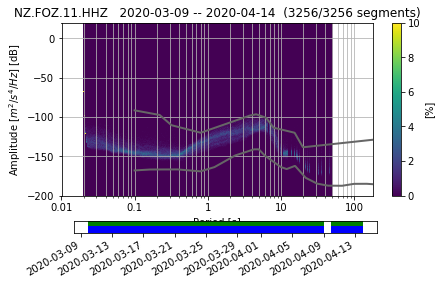

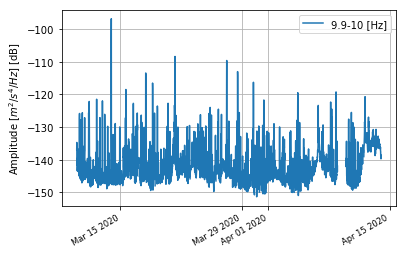

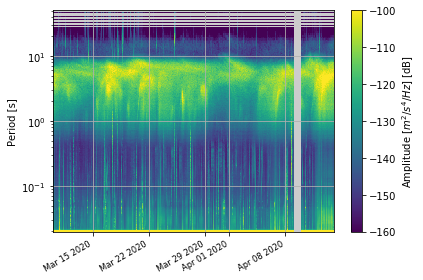

[None]

In [7]:
[ppsd.plot(max_percentage=10) for mseedid, ppsd in ppsds.items()]
[ppsd.plot_temporal(0.10) for mseedid, ppsd in ppsds.items()]
[ppsd.plot_spectrogram(clim=(-160,-100)) for mseedid, ppsd in ppsds.items()]

## Step 7: Process PSDs to extract the RMS(displacement)

This can be done for multiple filters at once (``freqs`` below):

In [8]:
# Define frequency bands of interest:
freqs = [(0.1,1.0),(1.0,20.0),(4.0,14.0),(4.0,20.0)]


def rms(s, f):
    # Parseval: the RMS in time domain is the sqrt of the integral of the power spectrum
    return np.sqrt(np.trapz(s, f))

displacement_RMS = {}
for mseedid, ppsd in ppsds.items():
    per = ppsd.period_bin_centers
    displacement_RMS[mseedid] = []
    for psd in ppsd.psd_values:
        RMS = {}
        for fmin, fmax in freqs:
            ix = np.where((per>=1.0/fmax) & (per<=1.0/fmin))

            # acceleration power spectrum in Hz
            spec = psd.copy()[ix][::-1]
            f = 1.0/per.copy()[ix][::-1]

            # remove NaNs from the list
            valid = np.where(np.isfinite(spec))[0]
            spec = spec[valid]
            f = f[valid]

            w2f = (2.0 * np.pi * f)

            # The acceleration amplitude spectrum (dB to Power! = divide by 10 and not 20!)
            amp = 10.0**(spec/10.) 

            # velocity spectrum (divide by omega**2)
            vamp = amp / w2f**2

            # displacement spectrum (divide by omega**2)
            damp =  vamp / w2f**2

            RMS["%.1f-%.1f"%(fmin, fmax)] = rms(damp, f)

        displacement_RMS[mseedid].append(RMS)
        index = pd.DatetimeIndex([d.datetime for d in ppsd.times_processed])
    displacement_RMS[mseedid] = pd.DataFrame(displacement_RMS[mseedid], index=index)
    print(mseedid," rms done.")

NZ.FOZ.11.HHZ  rms done.


## Step 8: Custom plot for a single frequency band:

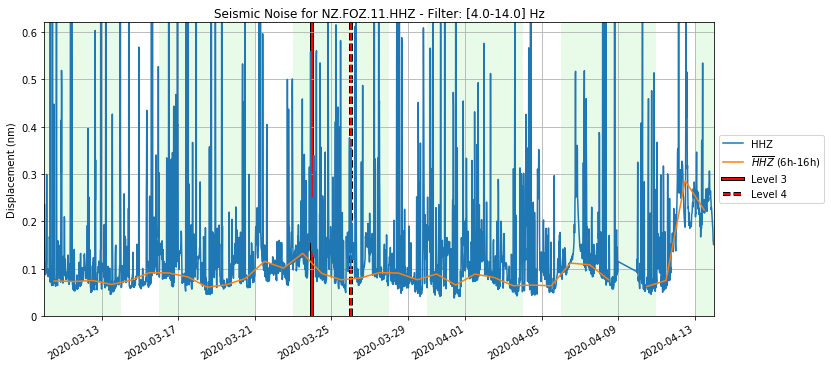

In [9]:
band = "4.0-14.0"

for mseedid in list(set(k[:-1] for k in displacement_RMS)):
    net, sta, loc, chan = mseedid.split('.')
    fig = plt.figure(figsize=(12,6))
    if logo is not None:
        fig.figimage(logo, 40, 40, alpha=.4, zorder=1)
    
    data={}
    for o in 'ZEN':
        if mseedid+o not in displacement_RMS:
            continue
        data[chan+o] = displacement_RMS[mseedid+o][band]
        main = chan+o
        
    if len(data.keys())>1:
        data[chan+'*'] = data[main].copy() # for the sum
        main = chan+'*'
        for i,t in enumerate(data[main].index):        
            data[main][i] = 0
            for o in data:
                if o == main:
                    continue
                if len(data[o].index)-1<i:
                    break
                if abs(data[o].index[i].timestamp()-data[main].index[i].timestamp())<60:
                    data[main][i] += data[o][i]**2
            data[main][i] = data[main][i]**.5
    
    plt.plot(data[main].index, data[main], label = main)
    
    for o in data:
        rs = data[o].copy().between_time("6:00", "16:00")
        rs = rs.resample("1D" ).median().tshift(12, "H")
        plt.plot(rs.index, rs, 
                 label="$\overline{%s}$ (6h-16h)"%o)

    

    # Get normal business days and set their background color to green
    db = pd.bdate_range(start.datetime, end.datetime)
    for dbi in db:
        plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                    facecolor='lightgreen', edgecolor="none",
                    alpha=0.2, zorder=-10)

    scale = 1e9
    plt.ylim(0,np.percentile(data[main],95)*1.5)
    ticks = ticker.FuncFormatter(lambda x, pos: "{0:g}".format(x*scale))
    plt.gca().yaxis.set_major_formatter(ticks)
    plt.ylabel("Displacement (nm)")

    plt.title('Seismic Noise for {}.{}.{}.{} - Filter: [{}] Hz'.format(
        net, sta, loc, main, band))
    plt.xlim(data[main].index.min(), data[main].index.max())
    fig.autofmt_xdate()
    plt.grid(True, zorder=-1)
    plt.gca().set_axisbelow(True)    
    for iban,ban in enumerate(bans.keys()):
        plt.axvline(UTCDateTime(ban).datetime,
                    color='r', 
                    linewidth=2,
                    linestyle=['-', '--', '-.', ':'][iban],
                    path_effects=[pe.withStroke(linewidth=4, foreground="k")],
                    zorder=-9,
                    label=bans[ban])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    fig.savefig(mseedid+".pdf",bbox_inches='tight')
    fig.savefig(mseedid+".png",bbox_inches='tight')

## Weekday / Time of day Analysis

In [13]:
# Just a bunch of helper functions
def stack_wday_time(df):
    """Takes a DateTimeIndex'ed DataFrame and returns the unstaked table: hours vs day name"""
    return df.groupby(level=(0,1)).median().unstack(level=-1).T.droplevel(0)[days]*1e9

def clock24_plot_commons():
    # Set the circumference labels
    ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
    ax.set_xticklabels(["%i h"%i for i in range(24)], fontsize=8)      
    ax.set_yticklabels(["%i nm" % i for i in np.arange(0,100, 10)], fontsize=7)
    ax.yaxis.set_tick_params(labelsize=8)

    # Make the labels go clockwise
    ax.set_theta_direction(-1)       

    # Place 0 at the top
    ax.set_theta_offset(np.pi/2.0)
    plt.xlabel("Hour (local time)", fontsize=10)
    plt.grid(True)

def radial_hours(N):
    hours = np.deg2rad(np.linspace(0, 360, N-1, endpoint=False))
    hours = np.append(hours, hours[0])
    return hours

def localize_tz_and_reindex(df, freq="15Min"):
    return df.copy().tz_localize("UTC").dropna().tz_convert(time_zone).tz_localize(None).resample(freq).mean().to_frame()

<Figure size 864x432 with 0 Axes>

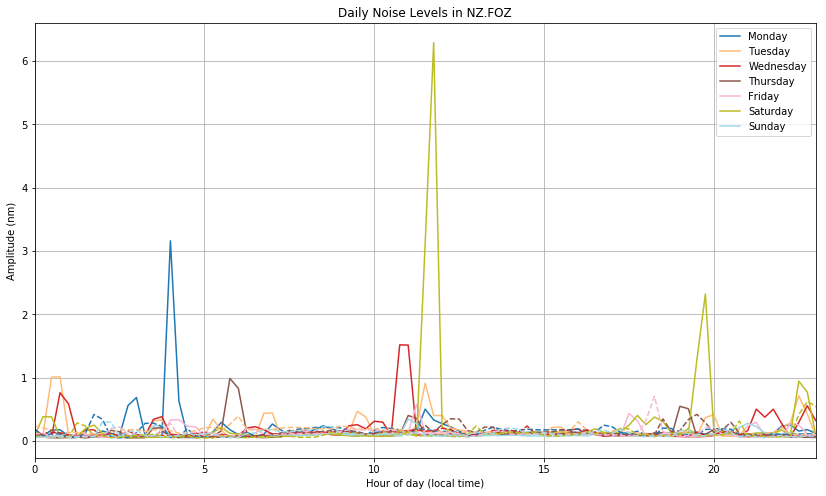

/home/chambeca/miniconda3/envs/eqcorrscan/lib/python3.7/site-packages/matplotlib/projections/polar.py:63: RuntimeWarning: invalid value encountered in less
  mask = r < 0


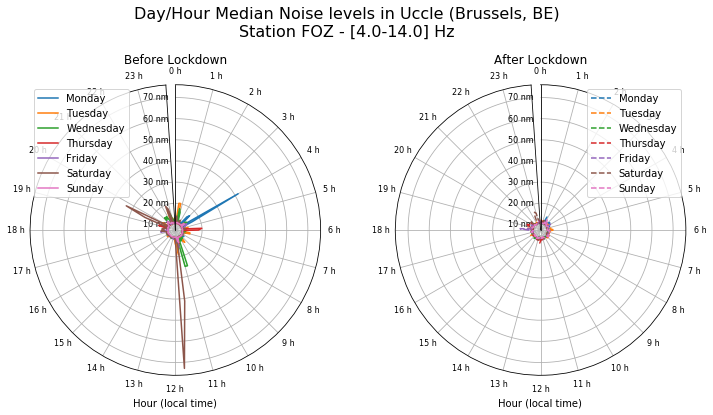

In [16]:
band = "4.0-14.0"

for channelcode in list(set([k[:-1] for k in displacement_RMS])):
    fig = plt.figure(figsize=(12,6))
    if logo is not None:
        fig.figimage(logo, 40, 40, alpha=.4, zorder=1)
    
    data={}
    for o in 'ZEN':
        if channelcode+o not in displacement_RMS :
            continue
        data[channelcode[-2:]+o] = displacement_RMS[channelcode+o][band]
    
    if len(data.keys())>1:
        data[channelcode[-2:]+'*'] = data[main].copy() # for the sum
        main=channelcode[-2:]+'*'
        for i,t in enumerate(data[main].index):        
            data[main][i] = 0
            for o in data:
                if o == main:
                    continue
                if len(data[o].index)-1<i:
                    break
                if abs(data[o].index[i].timestamp()-data[main].index[i].timestamp())<60:
                    data[main][i] += data[o][i]**2
            data[main][i] = data[main][i]**.5
    
    data[main] = localize_tz_and_reindex(data[main], "15Min")
    preloc = data[main].loc[:list(bans.keys())[0]]
    preloc = preloc.set_index([preloc.index.day_name(), preloc.index.hour+preloc.index.minute/60.])
    postloc = data[main].loc[list(bans.keys())[0]:]
    postloc = postloc.set_index([postloc.index.day_name(), postloc.index.hour+postloc.index.minute/60.])
    
    days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    cmap = plt.get_cmap("tab20")
    
    ax = stack_wday_time(preloc).plot(figsize=(14,8), cmap = cmap)
    stack_wday_time(postloc).plot(ls="--", ax=ax, legend=False,cmap = cmap)
    
    plt.title("Daily Noise Levels in %s.%s" % (network, station))
    plt.ylabel("Amplitude (nm)")
    plt.xlabel("Hour of day (local time)")
    plt.grid()
    plt.xlim(0,23)
    plt.show()
    
    # Polar/clock Plot:
    _ = stack_wday_time(preloc).copy()
    _.loc[len(_)+1] = _.iloc[0]
    _.index = radial_hours(len(_))

    plt.figure(figsize=(12,6))
    ax = plt.subplot(121, polar=True)
    _.plot(ax=ax)

    plt.title("Before Lockdown", fontsize=12)
    clock24_plot_commons()

    ax = plt.subplot(122, polar=True, sharey=ax)
    _ = stack_wday_time(postloc).copy()
    _.loc[len(_)+1] = _.iloc[0]
    _.index = radial_hours(len(_))

    _.plot(ax=ax, ls="--")

    plt.title("After Lockdown", fontsize=12)
    clock24_plot_commons()

    plt.suptitle("Day/Hour Median Noise levels in Uccle (Brussels, BE)\nStation %s - [%s] Hz" % (station, band), fontsize=16)
    plt.subplots_adjust(top=0.80)

    plt.show()
